In [1]:
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
X_small, y_small = datasets.load_digits(return_X_y=True)

**Покажем как выглядят данные в датасете:**

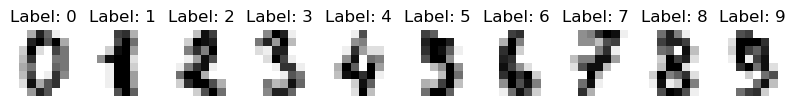

In [3]:
def plot_digits(X, y, num_images=10):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X[i].reshape(8, 8), cmap=plt.cm.gray_r)
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()

plot_digits(X_small, y_small, num_images=10)

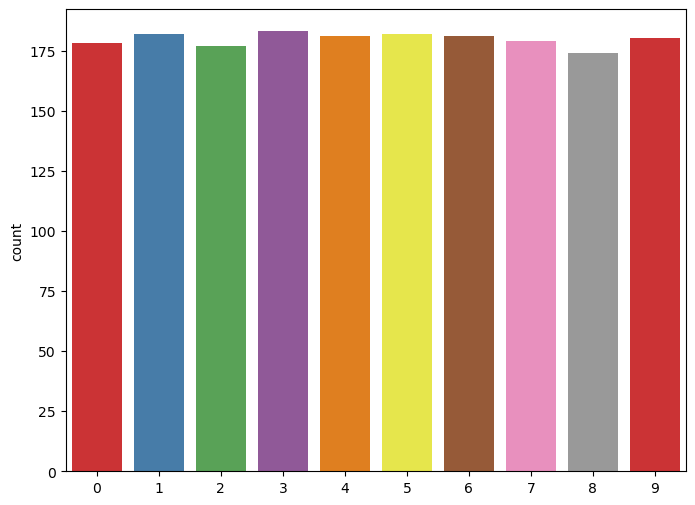

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_small, palette="Set1")
plt.show()

In [5]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, test_size=0.3)

In [6]:
print(f"X size: {len(X_small)}")
print(f"X train size: {len(X_train_small)}")
print(f"X test size: {len(X_test_small)}")
print(f"y size: {len(y_small)}")
print(f"y train size: {len(y_train_small)}")
print(f"y test size: {len(y_test_small)}")

X size: 1797
X train size: 1257
X test size: 540
y size: 1797
y train size: 1257
y test size: 540


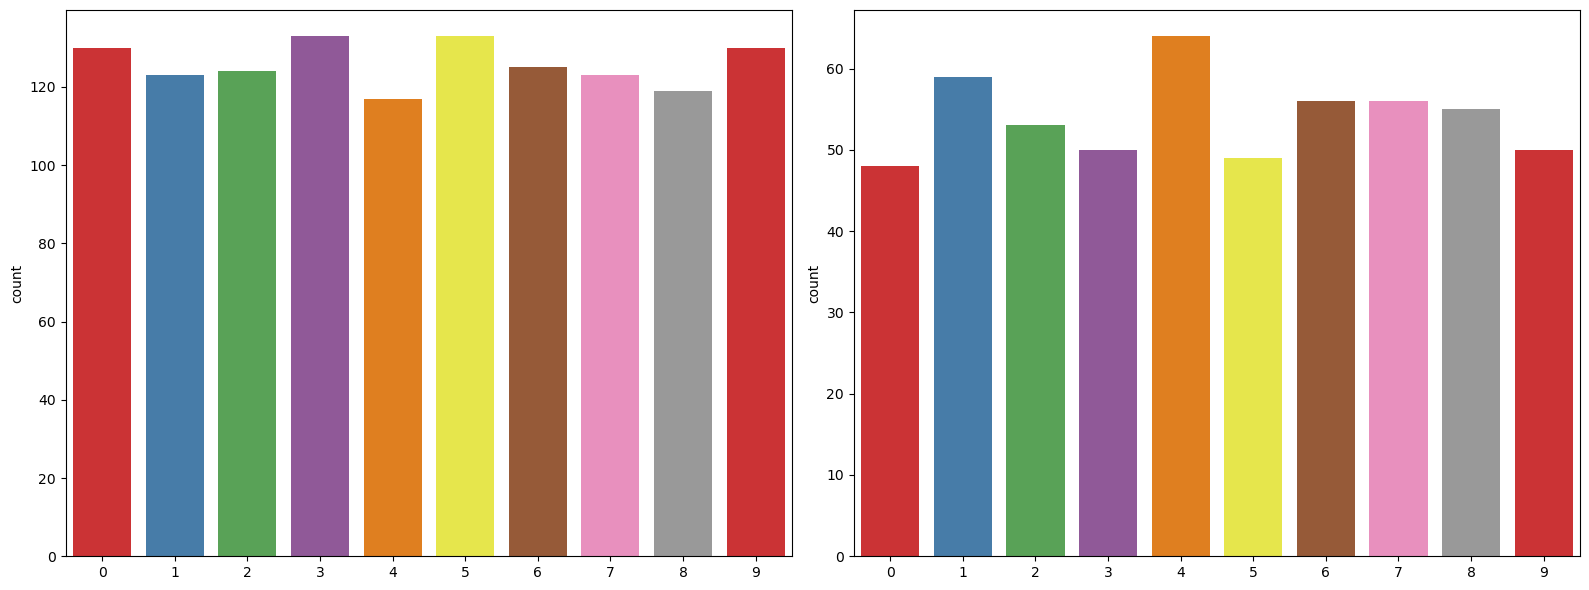

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(x=y_test_small, ax=axes[1], palette="Set1")
sns.countplot(x=y_train_small, ax=axes[0], palette="Set1")
plt.tight_layout()
plt.show()

# Многоклассовая классификация на небольшом наборе (все цифры)

In [9]:
mlp_small = MLPClassifier()
mlp_small.fit(X_train_small, y_train_small)

MLPClassifier()

In [10]:
y_pred_small = mlp_small.predict(X_test_small)

report_small = classification_report(y_test_small, y_pred_small)
conf_small = confusion_matrix(y_test_small, y_pred_small)

print(report_small)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.95      0.98      0.97        59
           2       0.98      1.00      0.99        53
           3       0.96      0.96      0.96        50
           4       1.00      0.98      0.99        64
           5       0.98      1.00      0.99        49
           6       0.98      1.00      0.99        56
           7       0.98      0.98      0.98        56
           8       0.93      0.93      0.93        55
           9       0.98      0.92      0.95        50

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



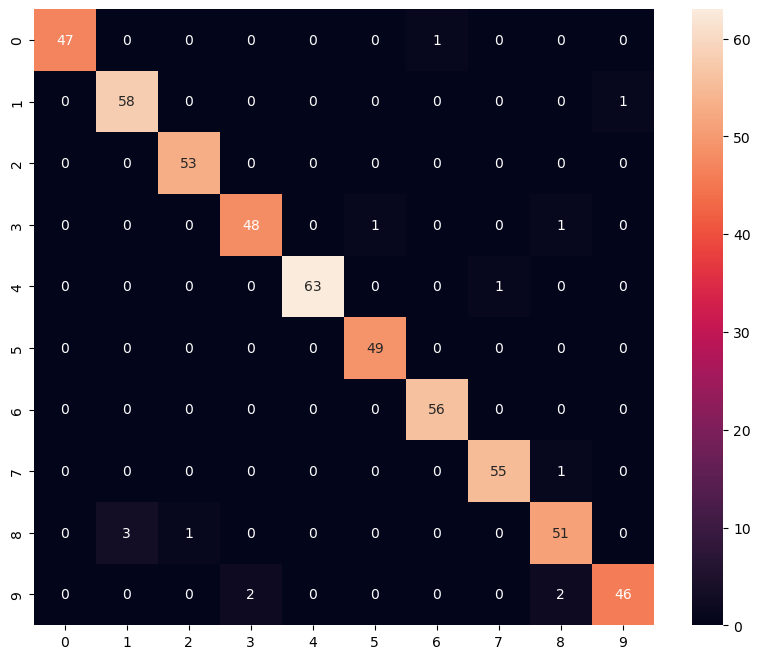

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_small, annot=True, fmt="d", cmap="rocket")
plt.show()

**Покажем ошибочные предсказания:**

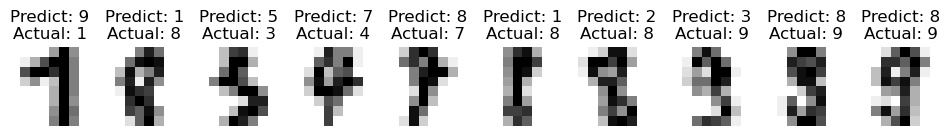

In [12]:
errors = np.where(y_pred_small != y_test_small)[0]

num_errors_to_show = 10
error_indices = errors[:num_errors_to_show]

plt.figure(figsize=(12, 10))
for i, index in enumerate(error_indices):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test_small[index].reshape(8, 8), cmap=plt.cm.gray_r)
    plt.title(f"Predict: {y_pred_small[index]}\nActual: {y_test_small[index]}")
    plt.axis('off')
plt.show()

# Бинарная классификация на небольшом наборе (четные и нечетные)

**Класс 0: четные**

**Класс 1: нечетные**

In [13]:
y_train_binary_even_odd = np.where(y_train_small % 2 == 0, 0, 1)
y_test_binary_even_odd = np.where(y_test_small % 2 == 0, 0, 1)

mlp_binary_even_odd = MLPClassifier()
mlp_binary_even_odd.fit(X_train_small, y_train_binary_even_odd)

y_pred_binary_even_odd = mlp_binary_even_odd.predict(X_test_small)

report_binary_even_odd = classification_report(y_test_binary_even_odd, y_pred_binary_even_odd)
conf_binary_even_odd = confusion_matrix(y_test_binary_even_odd, y_pred_binary_even_odd)

print(report_binary_even_odd)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       276
           1       0.98      0.99      0.99       264

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



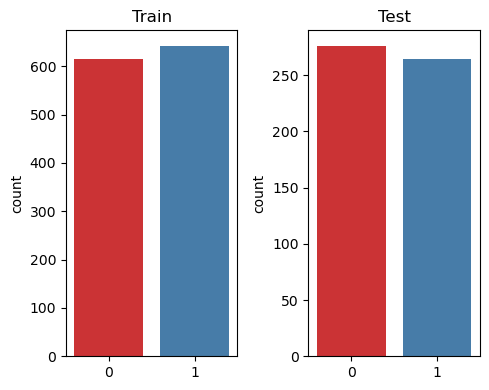

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(5, 4))
sns.countplot(x=y_test_binary_even_odd, ax=axes[1], palette="Set1")
axes[1].set_title("Test")
sns.countplot(x=y_train_binary_even_odd, ax=axes[0], palette="Set1")
axes[0].set_title("Train")
plt.tight_layout()
plt.show()

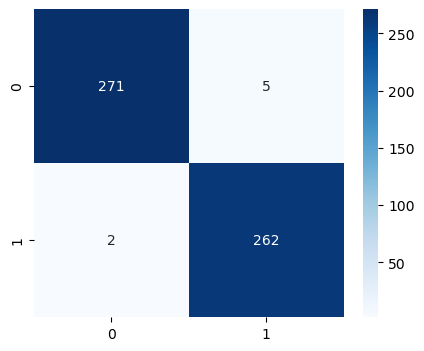

In [15]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_binary_even_odd, annot=True, fmt="d", cmap="Blues")
plt.show()

**Класс 0: четные**

**Класс 1: нечетные**

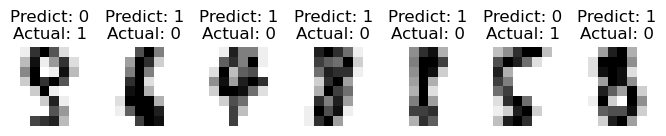

In [16]:
errors = np.where(y_pred_binary_even_odd != y_test_binary_even_odd)[0]

num_errors_to_show = 10
error_indices = errors[:num_errors_to_show]

plt.figure(figsize=(12, 10))
for i, index in enumerate(error_indices):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test_small[index].reshape(8, 8), cmap=plt.cm.gray_r)
    plt.title(f"Predict: {y_pred_binary_even_odd[index]}\nActual: {y_test_binary_even_odd[index]}")
    plt.axis('off')

plt.show()

# Бинарная классификация на небольшом наборе (0 и все остальные)

In [17]:
y_train_binary_zero_rest = np.where(y_train_small == 0, 0, 1)
y_test_binary_zero_rest = np.where(y_test_small == 0, 0, 1)

mlp_binary_zero_rest = MLPClassifier()
mlp_binary_zero_rest.fit(X_train_small, y_train_binary_zero_rest)

y_pred_binary_zero_rest = mlp_binary_zero_rest.predict(X_test_small)

report_binary_zero_rest = classification_report(y_test_binary_zero_rest, y_pred_binary_zero_rest)
conf_binary_zero_rest = confusion_matrix(y_test_binary_zero_rest, y_pred_binary_zero_rest)

print(report_binary_zero_rest)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00       492

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540



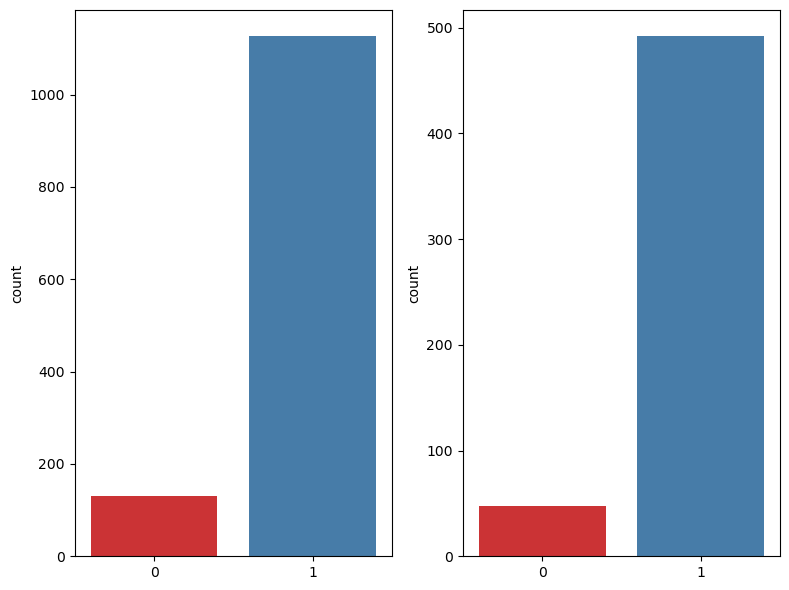

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6))
sns.countplot(x=y_train_binary_zero_rest, ax=axes[0], palette="Set1")
sns.countplot(x=y_test_binary_zero_rest, ax=axes[1], palette="Set1")
plt.tight_layout()
plt.show()

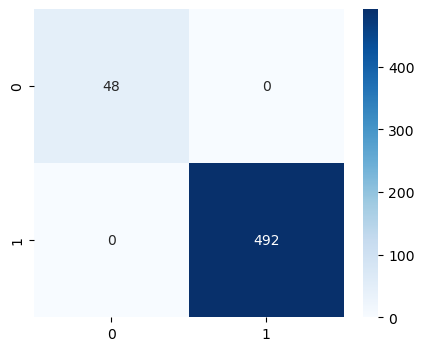

In [19]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_binary_zero_rest, annot=True, fmt="d", cmap="Blues")
plt.show()

In [20]:
errors = np.where(y_pred_binary_zero_rest != y_test_binary_zero_rest)[0]

num_errors_to_show = 10
error_indices = errors[:num_errors_to_show]

plt.figure(figsize=(12, 10))
for i, index in enumerate(error_indices):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test_small[index].reshape(8, 8), cmap=plt.cm.gray_r)
    plt.title(f"{y_pred_binary_zero_rest[index]},{y_test_binary_zero_rest[index]}")
    plt.axis('off')

<Figure size 1200x1000 with 0 Axes>

# Нормализация 

**Сравним StandartScaler и MinMaxScaler на многоклассовой классификации**

In [44]:
scaler = StandardScaler()  
scaler.fit(X_train_small)
X_train_small_scaled = scaler.transform(X_train_small) 
X_test_small_scaled = scaler.transform(X_test_small)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      1.00      0.99        52
           2       1.00      1.00      1.00        52
           3       0.97      0.97      0.97        58
           4       1.00      0.94      0.97        52
           5       0.94      1.00      0.97        47
           6       1.00      0.98      0.99        51
           7       0.94      1.00      0.97        63
           8       0.97      0.98      0.98        66
           9       0.98      0.88      0.92        49

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



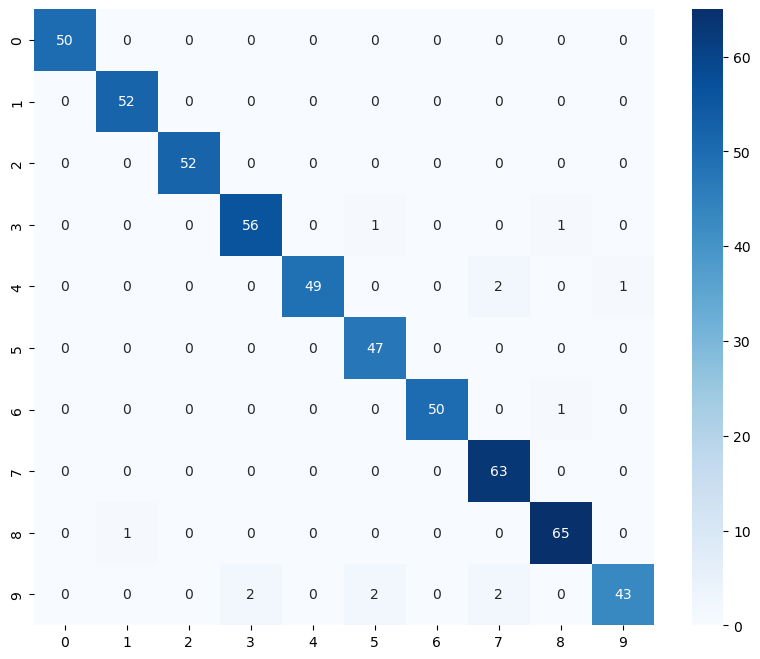

In [45]:
mlp_small = MLPClassifier()
mlp_small.fit(X_train_small_scaled, y_train_small)

y_pred_small = mlp_small.predict(X_test_small_scaled)

report_small = classification_report(y_test_small, y_pred_small)
conf_small = confusion_matrix(y_test_small, y_pred_small)

print(report_small)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_small, annot=True, fmt="d", cmap="Blues")
plt.show()

In [49]:
scaler = MinMaxScaler()  
scaler.fit(X_train_small)
X_train_small_scaled = scaler.transform(X_train_small) 
X_test_small_scaled = scaler.transform(X_test_small)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      1.00      0.98        52
           2       1.00      0.98      0.99        52
           3       1.00      0.95      0.97        58
           4       0.98      0.96      0.97        52
           5       0.90      1.00      0.95        47
           6       1.00      0.98      0.99        51
           7       0.95      0.98      0.97        63
           8       0.97      0.97      0.97        66
           9       0.98      0.92      0.95        49

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.98      0.97      0.97       540



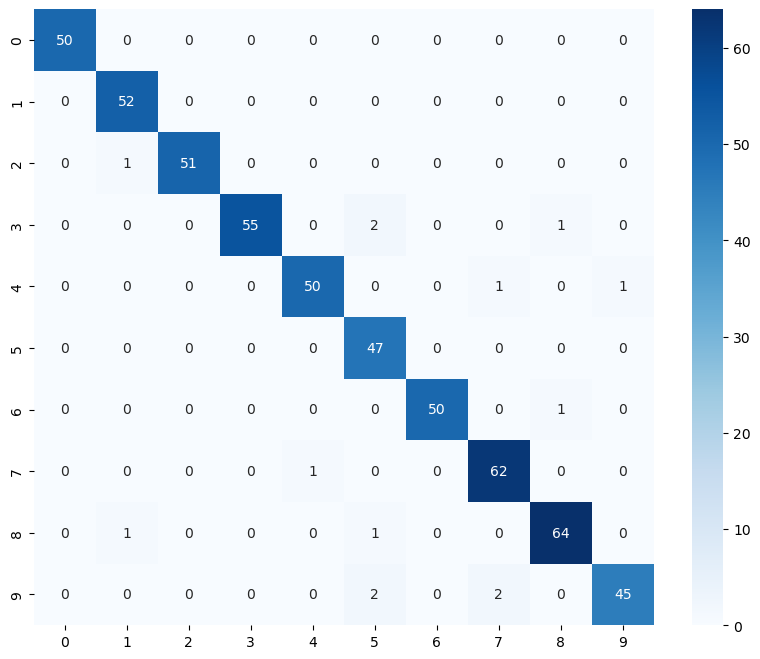

In [50]:
mlp_small = MLPClassifier()
mlp_small.fit(X_train_small_scaled, y_train_small)

y_pred_small = mlp_small.predict(X_test_small_scaled)

report_small = classification_report(y_test_small, y_pred_small)
conf_small = confusion_matrix(y_test_small, y_pred_small)

print(report_small)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_small, annot=True, fmt="d", cmap="Blues")
plt.show()

**В принципе точность почти одинаковая, так что нет разницы в использовании этих методов**

**В дальнейшем везде использовался StandardScaler**

# Параметр альфа

**Поиск параметра регуляризации с помощью GridSearchCV**

In [64]:
scaler = StandardScaler()  
scaler.fit(X_train_small)
X_train_small_scaled = scaler.transform(X_train_small) 
X_test_small_scaled = scaler.transform(X_test_small)

mlp_small = MLPClassifier()
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7)
}

grid_search = GridSearchCV(mlp_small, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_small_scaled, y_train_small)

print("Лучшее значение alpha:", grid_search.best_params_)
print("Лучшая точность:", grid_search.best_score_)

Лучшее значение alpha: {'alpha': 0.0001}
Лучшая точность: 0.9844494466578133


# Solver

**Теперь попробуем применить другой solver = lbfgs, а не стандартный Adam**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      1.00      0.99        52
           2       0.98      1.00      0.99        52
           3       1.00      0.95      0.97        58
           4       0.98      0.94      0.96        52
           5       0.90      0.98      0.94        47
           6       1.00      0.98      0.99        51
           7       0.95      1.00      0.98        63
           8       0.98      0.98      0.98        66
           9       0.98      0.92      0.95        49

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



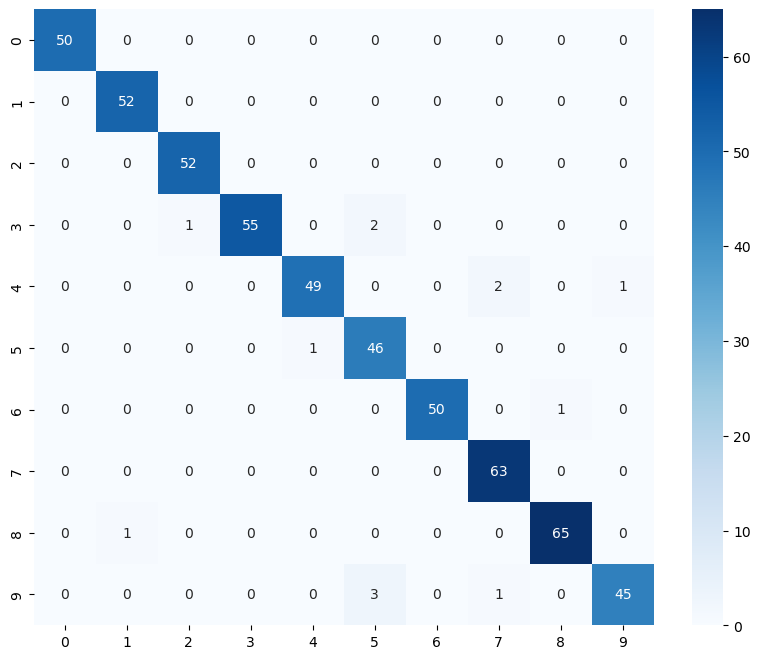

In [83]:
scaler = StandardScaler()  
scaler.fit(X_train_small)
X_train_small_scaled = scaler.transform(X_train_small) 
X_test_small_scaled = scaler.transform(X_test_small)

mlp_small = MLPClassifier(alpha=0.0001, solver='lbfgs')
mlp_small.fit(X_train_small_scaled, y_train_small)

y_pred_small = mlp_small.predict(X_test_small_scaled)

report_small = classification_report(y_test_small, y_pred_small)
conf_small = confusion_matrix(y_test_small, y_pred_small)

print(report_small)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_small, annot=True, fmt="d", cmap="Blues")
plt.show()

**Особой разницы не обнаружено**

# Многоклассовая классификация на большом наборе

In [21]:
X_big, y_big = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y_big = y_big.astype(int)

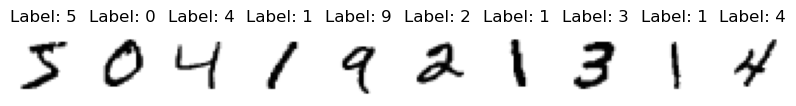

In [22]:
def plot_digits(X, y, num_images=10):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.gray_r)
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()

plot_digits(X_big, y_big, num_images=10)

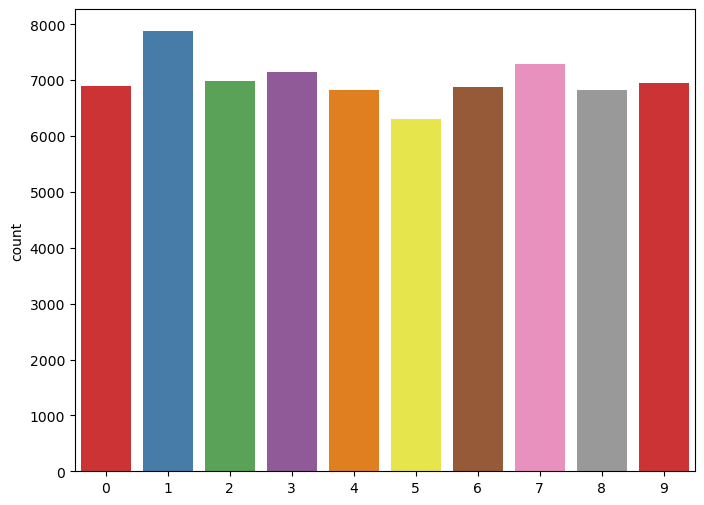

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_big, palette="Set1")
plt.show()

In [29]:
X_train_big, X_test_big, y_train_big, y_test_big = train_test_split(X_big, y_big, test_size=0.3)

In [30]:
print(f"X size: {len(X_big)}")
print(f"X train size: {len(X_train_big)}")
print(f"X test size: {len(X_test_big)}")
print(f"y size: {len(y_big)}")
print(f"y train size: {len(y_train_big)}")
print(f"y test size: {len(y_test_big)}")

X size: 70000
X train size: 49000
X test size: 21000
y size: 70000
y train size: 49000
y test size: 21000


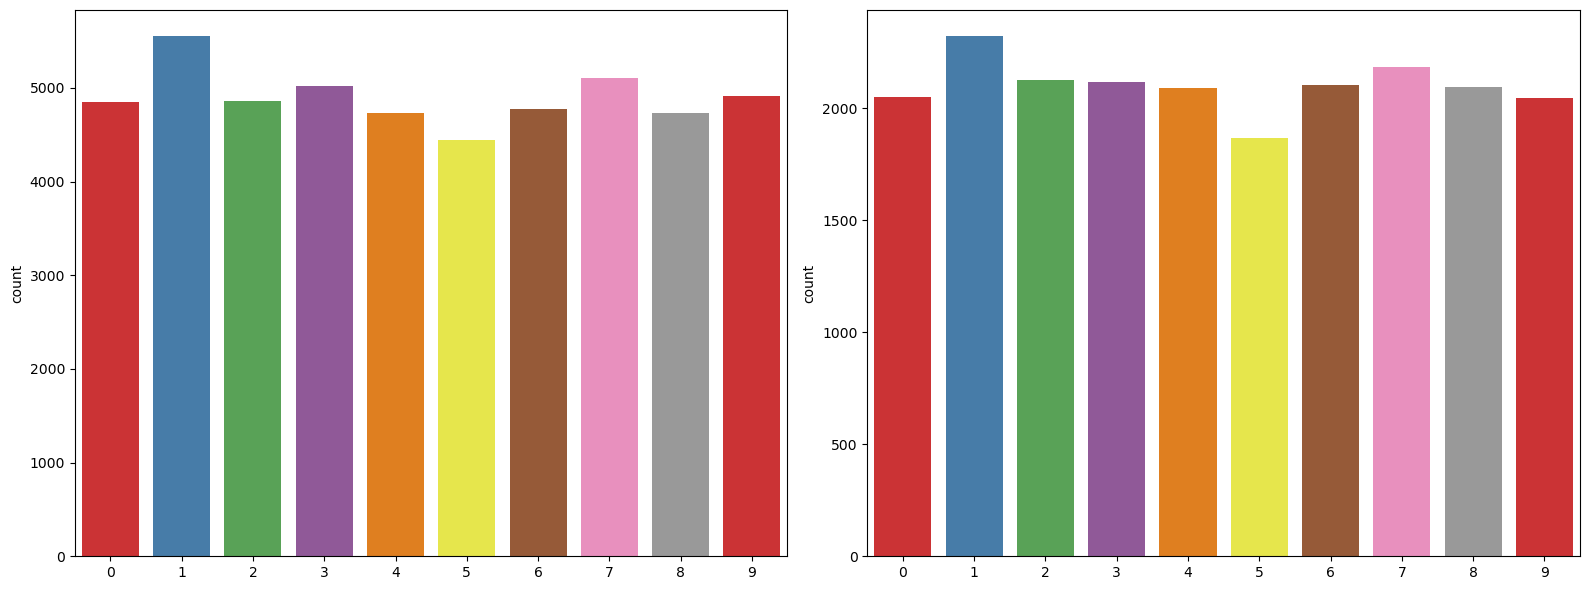

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(x=y_test_big, ax=axes[1], palette="Set1")
sns.countplot(x=y_train_big, ax=axes[0], palette="Set1")
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2051
           1       0.98      0.99      0.98      2322
           2       0.96      0.96      0.96      2125
           3       0.97      0.94      0.96      2116
           4       0.98      0.95      0.96      2092
           5       0.95      0.97      0.96      1866
           6       0.97      0.98      0.98      2103
           7       0.96      0.97      0.96      2185
           8       0.95      0.93      0.94      2095
           9       0.93      0.95      0.94      2045

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0.96      0.96      0.96     21000



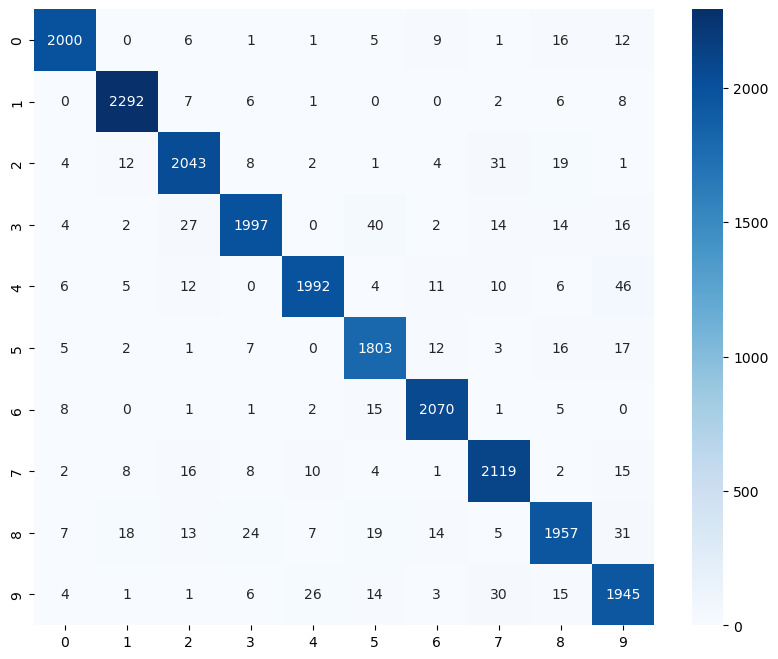

In [33]:
mlp_big = MLPClassifier()
mlp_big.fit(X_train_big, y_train_big)

y_pred_big = mlp_big.predict(X_test_big)

report_big = classification_report(y_test_big, y_pred_big)
conf_big = confusion_matrix(y_test_big, y_pred_big)

print(report_big)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_big, annot=True, fmt="d", cmap="Blues")
plt.show()

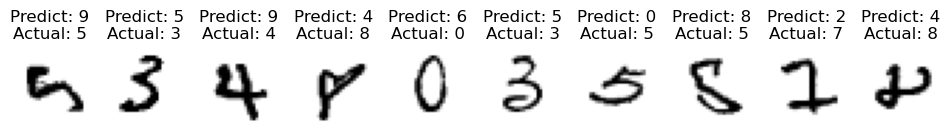

In [34]:
errors = np.where(y_pred_big != y_test_big)[0]

num_errors_to_show = 10
error_indices = errors[:num_errors_to_show]

plt.figure(figsize=(12, 10))
for i, index in enumerate(error_indices):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test_big[index].reshape(28, 28), cmap=plt.cm.gray_r)
    plt.title(f"Predict: {y_pred_big[index]}\nActual: {y_test_big[index]}")
    plt.axis('off')

plt.show()

# Бинарная классификация на большом наборе (четные и нечетные)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10466
           1       0.98      0.98      0.98     10534

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000



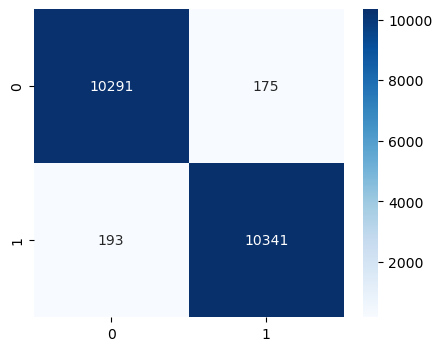

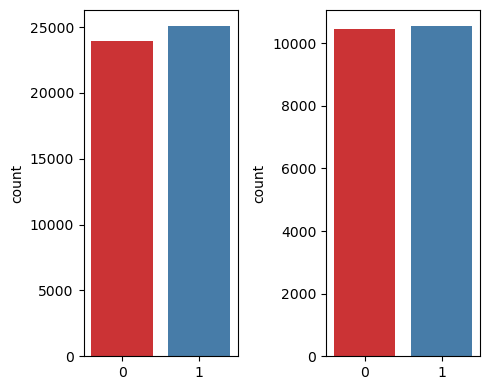

In [39]:
y_train_big_binary_even_odd = np.where(y_train_big % 2 == 0, 0, 1)
y_test_big_binary_even_odd = np.where(y_test_big % 2 == 0, 0, 1)

mlp_big_binary_even_odd = MLPClassifier()
mlp_big_binary_even_odd.fit(X_train_big, y_train_big_binary_even_odd)

y_pred_big_binary_even_odd = mlp_big_binary_even_odd.predict(X_test_big)

report_big_binary_even_odd = classification_report(y_test_big_binary_even_odd, y_pred_big_binary_even_odd)
conf_big_binary_even_odd = confusion_matrix(y_test_big_binary_even_odd, y_pred_big_binary_even_odd)

print(report_big_binary_even_odd)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_big_binary_even_odd, annot=True, fmt="d", cmap="Blues")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(5, 4))
sns.countplot(x=y_test_big_binary_even_odd, ax=axes[1], palette="Set1")
sns.countplot(x=y_train_big_binary_even_odd, ax=axes[0], palette="Set1")
plt.tight_layout()
plt.show()

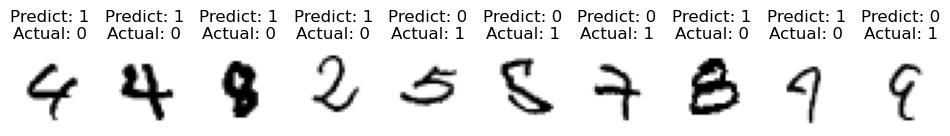

In [40]:
errors = np.where(y_pred_big_binary_even_odd != y_test_big_binary_even_odd)[0]

num_errors_to_show = 10
error_indices = errors[:num_errors_to_show]

plt.figure(figsize=(12, 10))
for i, index in enumerate(error_indices):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test_big[index].reshape(28, 28), cmap=plt.cm.gray_r)
    plt.title(f"Predict: {y_pred_big_binary_even_odd[index]}\nActual: {y_test_big_binary_even_odd[index]}")
    plt.axis('off')

plt.show()

# Бинарная классификация на большом наборе (0 и все остальные)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2051
           1       1.00      1.00      1.00     18949

    accuracy                           1.00     21000
   macro avg       0.99      0.98      0.99     21000
weighted avg       1.00      1.00      1.00     21000



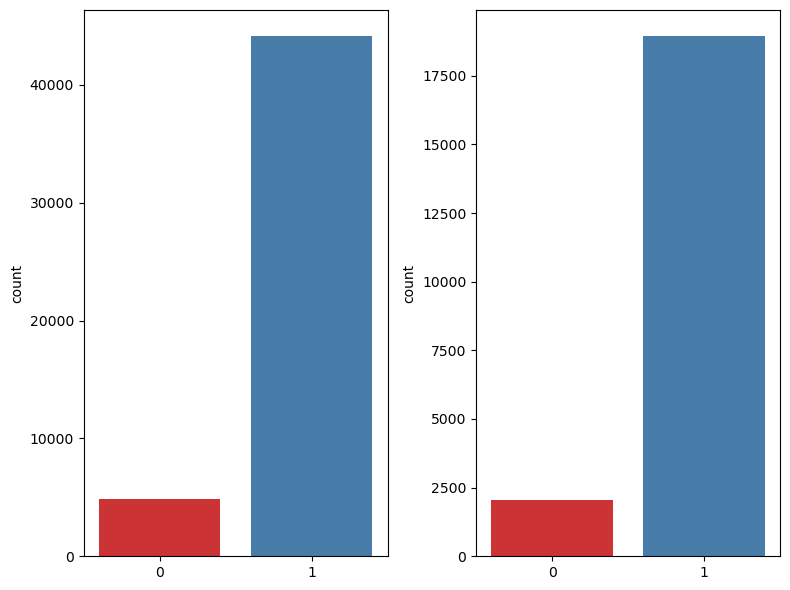

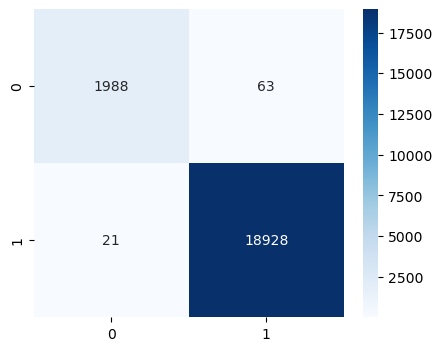

In [37]:
y_train_big_binary_zero_rest = np.where(y_train_big == 0, 0, 1)
y_test_big_binary_zero_rest = np.where(y_test_big == 0, 0, 1)

mlp_big_binary_zero_rest = MLPClassifier()
mlp_big_binary_zero_rest.fit(X_train_big, y_train_big_binary_zero_rest)

y_pred_big_binary_zero_rest = mlp_big_binary_zero_rest.predict(X_test_big)

report_big_binary_zero_rest = classification_report(y_test_big_binary_zero_rest, y_pred_big_binary_zero_rest)
conf_big_binary_zero_rest = confusion_matrix(y_test_big_binary_zero_rest, y_pred_big_binary_zero_rest)

print(report_big_binary_zero_rest)

fig, axes = plt.subplots(1, 2, figsize=(8, 6))
sns.countplot(x=y_test_big_binary_zero_rest, ax=axes[1], palette="Set1")
sns.countplot(x=y_train_big_binary_zero_rest, ax=axes[0], palette="Set1")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 4))
sns.heatmap(conf_big_binary_zero_rest, annot=True, fmt="d", cmap="Blues")
plt.show()

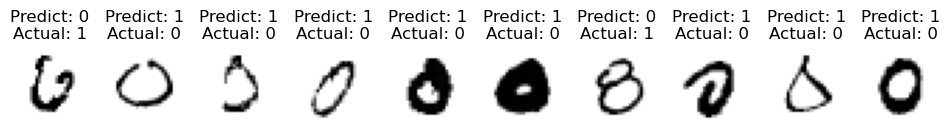

In [38]:
errors = np.where(y_pred_big_binary_zero_rest != y_test_big_binary_zero_rest)[0]

num_errors_to_show = 10
error_indices = errors[:num_errors_to_show]

plt.figure(figsize=(12, 10))
for i, index in enumerate(error_indices):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test_big[index].reshape(28, 28), cmap=plt.cm.gray_r)
    plt.title(f"Predict: {y_pred_big_binary_zero_rest[index]}\nActual: {y_test_big_binary_zero_rest[index]}")
    plt.axis('off')

plt.show()

# Нормализация

**Сравним StandartScaler и MinMaxScaler на многоклассовой классификации**

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2080
           1       0.99      0.98      0.99      2361
           2       0.96      0.97      0.96      2097
           3       0.96      0.97      0.96      2148
           4       0.96      0.97      0.97      2053
           5       0.97      0.96      0.96      1886
           6       0.98      0.98      0.98      2046
           7       0.97      0.97      0.97      2163
           8       0.97      0.96      0.96      2034
           9       0.96      0.96      0.96      2132

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000



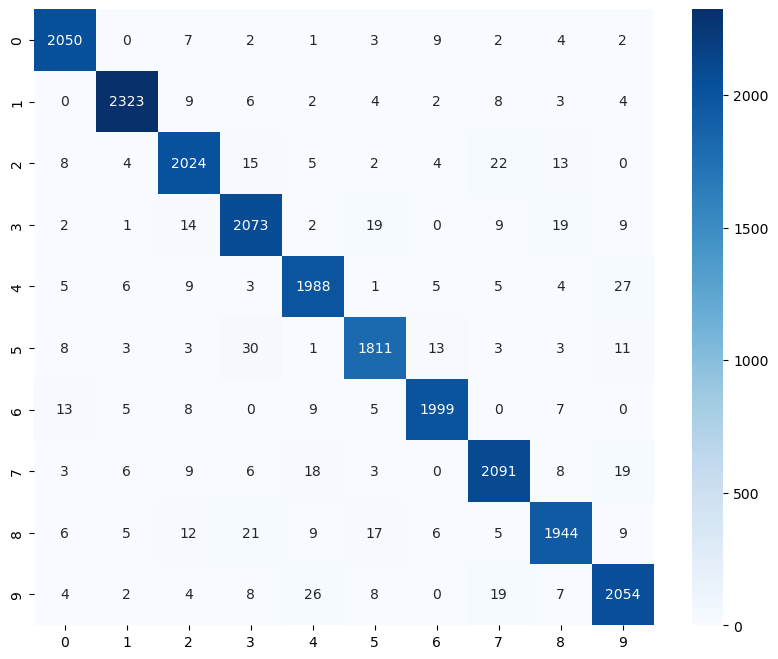

In [109]:
scaler = StandardScaler()  
scaler.fit(X_train_big)
X_train_big_scaled = scaler.transform(X_train_big) 
X_test_big_scaled = scaler.transform(X_test_big)

mlp_big = MLPClassifier()
mlp_big.fit(X_train_big_scaled, y_train_big)

y_pred_big = mlp_big.predict(X_test_big_scaled)

report_big = classification_report(y_test_big, y_pred_big)
conf_big = confusion_matrix(y_test_big, y_pred_big)

print(report_big)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_big, annot=True, fmt="d", cmap="Blues")
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2080
           1       0.99      0.99      0.99      2361
           2       0.98      0.97      0.97      2097
           3       0.97      0.97      0.97      2148
           4       0.97      0.98      0.98      2053
           5       0.97      0.97      0.97      1886
           6       0.98      0.98      0.98      2046
           7       0.98      0.97      0.98      2163
           8       0.97      0.97      0.97      2034
           9       0.98      0.97      0.97      2132

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000



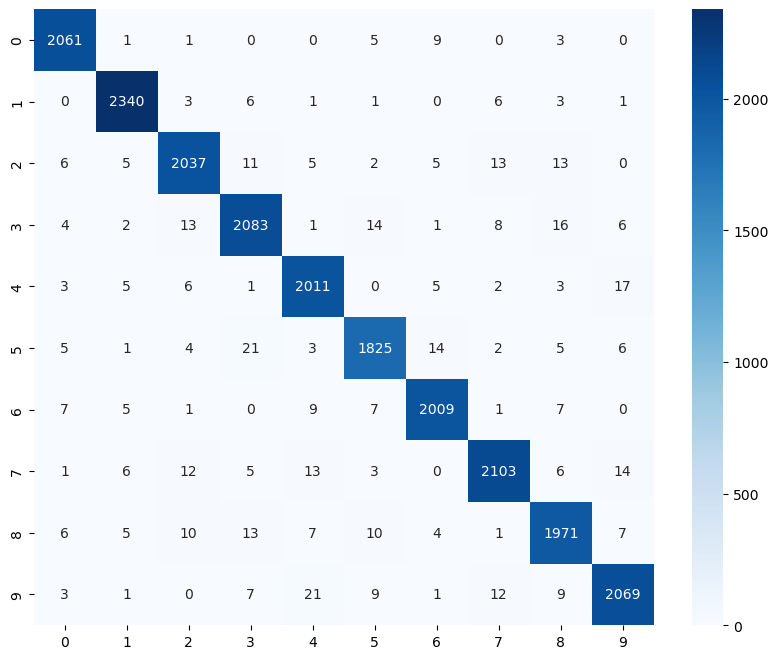

In [110]:
scaler = MinMaxScaler()  
scaler.fit(X_train_big)
X_train_big_scaled = scalber.transform(X_train_big) 
X_test_big_scaled = scaler.transform(X_test_big)

mlp_big = MLPClassifier()
mlp_big.fit(X_train_big_scaled, y_train_big)

y_pred_big = mlp_big.predict(X_test_big_scaled)

report_big = classification_report(y_test_big, y_pred_big)
conf_big = confusion_matrix(y_test_big, y_pred_big)

print(report_big)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_big, annot=True, fmt="d", cmap="Blues")
plt.show()

**То же самое**

# Параметр альфа

**Взяли MinMaxScaler для дальнейшего использования**

**Поиск параметра регуляризации**

In [112]:
scaler = MinMaxScaler()  
scaler.fit(X_train_big)
X_train_big_scaled = scaler.transform(X_train_big) 
X_test_big_scaled = scaler.transform(X_test_big)

mlp_big = MLPClassifier()
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 5)
}

grid_search = GridSearchCV(mlp_big, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_big_scaled, y_train_big)

print("Лучшее значение alpha:", grid_search.best_params_)
print("Лучшая точность:", grid_search.best_score_)

Лучшее значение alpha: {'alpha': 0.1}
Лучшая точность: 0.9767142857142858


# Solver

**Возьмём SGD и посмотрим результаты**

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2080
           1       0.97      0.99      0.98      2361
           2       0.97      0.95      0.96      2097
           3       0.95      0.96      0.95      2148
           4       0.96      0.97      0.97      2053
           5       0.96      0.94      0.95      1886
           6       0.97      0.97      0.97      2046
           7       0.96      0.97      0.97      2163
           8       0.96      0.95      0.95      2034
           9       0.96      0.96      0.96      2132

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0.96      0.96      0.96     21000



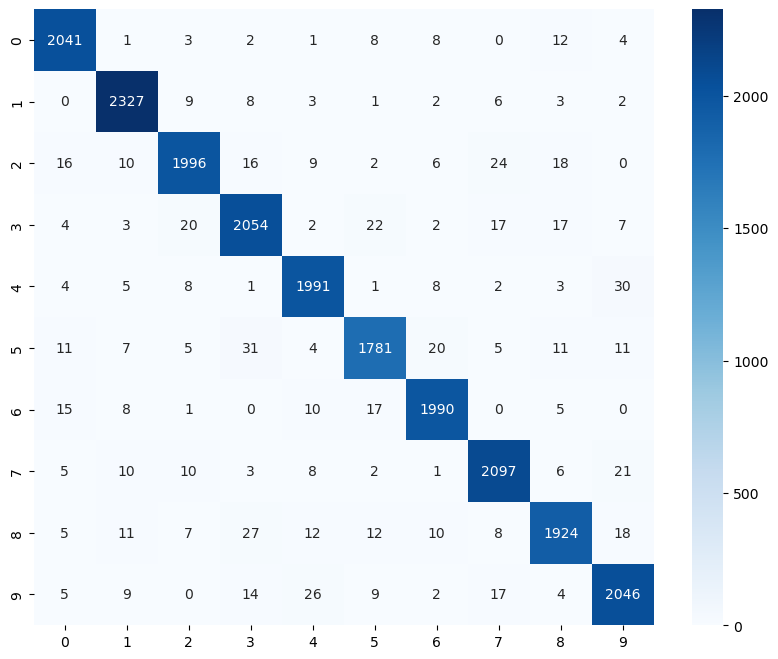

In [113]:
scaler = MinMaxScaler()  
scaler.fit(X_train_big)
X_train_big_scaled = scaler.transform(X_train_big) 
X_test_big_scaled = scaler.transform(X_test_big)

mlp_big = MLPClassifier(alpha=0.1, solver='sgd')
mlp_big.fit(X_train_big_scaled, y_train_big)

y_pred_big = mlp_big.predict(X_test_big_scaled)

report_big = classification_report(y_test_big, y_pred_big)
conf_big = confusion_matrix(y_test_big, y_pred_big)

print(report_big)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_big, annot=True, fmt="d", cmap="Blues")
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2080
           1       0.98      0.99      0.99      2361
           2       0.97      0.98      0.97      2097
           3       0.97      0.97      0.97      2148
           4       0.97      0.98      0.98      2053
           5       0.98      0.96      0.97      1886
           6       0.98      0.98      0.98      2046
           7       0.98      0.97      0.98      2163
           8       0.97      0.97      0.97      2034
           9       0.97      0.97      0.97      2132

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000



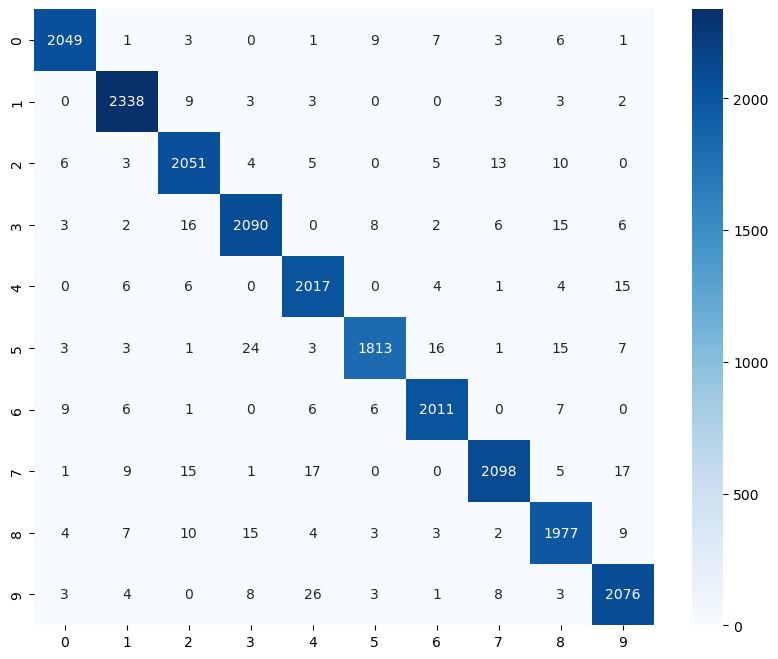

In [114]:
scaler = MinMaxScaler()  
scaler.fit(X_train_big)
X_train_big_scaled = scaler.transform(X_train_big) 
X_test_big_scaled = scaler.transform(X_test_big)

mlp_big = MLPClassifier(alpha=0.1, solver='adam')
mlp_big.fit(X_train_big_scaled, y_train_big)

y_pred_big = mlp_big.predict(X_test_big_scaled)

report_big = classification_report(y_test_big, y_pred_big)
conf_big = confusion_matrix(y_test_big, y_pred_big)

print(report_big)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_big, annot=True, fmt="d", cmap="Blues")
plt.show()

**Adam работает лучше**